Reverse positive mode
====
Starting from (M,RT) pairs, can we see which transformations are there

In [70]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
from scipy import stats

base_dir = '/Users/simon/git/ms1fun/'
sys.path.append(base_dir + 'code')
sys.path.append(base_dir + 'dbs')

from corr_cluster import Peak,BetaLike,CorrCluster
from formula import Formula
import pylab as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
files = []
prefix = '/Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/Standard_files_Beer_Urine_April2015/Positive_Filtered/csv/'
filename = 'STD_MIX1_60stepped_1E5_Top5'
files.append((prefix,filename,False))
filename = 'STD_MIX2_60stepped_1E5_Top5'
files.append((prefix,filename,False))
filename = 'STD_MIX3_60stepped_1E5_Top5'
files.append((prefix,filename,False))




In [72]:
import transformation
transformations = transformation.load_from_file(base_dir + 'dbs/pos_transformations_camra.yml')
print
print "Loaded " + str(len(transformations)) + " transformations"


sorted_transformations = sorted(transformations,key = lambda x: x.vote,reverse=True)
print
print "Transformation,prob"
for t in sorted_transformations:
    print "{},{:.3f}".format(t.name,t.vote)

Charge Probabilities
+K: 0.200
+2H: 0.100
+H: 0.500
+Na: 0.200

Adduct Probabilities
-CO: 0.071
+CH2O2: 0.071
none: 0.357
+ACN: 0.071
-C2H2: 0.071
-CH2O2: 0.071
+CH3OH: 0.071
-NH3: 0.071
-H2O: 0.071
+NH3: 0.071

Isotope Probabilities
C13: 0.154
mono: 0.769
2C13: 0.077

Multiplicity Probabilities
1: 0.909
2: 0.091

Loaded 150 transformations

Transformation,prob
M+H,0.125
M+K,0.050
M+Na,0.050
M+2H,0.025
M+H[C13],0.025
[M-CO]+H,0.025
[M+CH2O2]+H,0.025
[M+ACN]+H,0.025
[M-C2H2]+H,0.025
[M-CH2O2]+H,0.025
[M+CH3OH]+H,0.025
[M-NH3]+H,0.025
[M-H2O]+H,0.025
[M+NH3]+H,0.025
2M+H,0.012
M+H[2C13],0.012
M+K[C13],0.010
M+Na[C13],0.010
[M-CO]+K,0.010
[M+CH2O2]+K,0.010
[M+ACN]+K,0.010
[M-C2H2]+K,0.010
[M-CH2O2]+K,0.010
[M+CH3OH]+K,0.010
[M-NH3]+K,0.010
[M-H2O]+K,0.010
[M+NH3]+K,0.010
[M-CO]+Na,0.010
[M+CH2O2]+Na,0.010
[M+ACN]+Na,0.010
[M-C2H2]+Na,0.010
[M-CH2O2]+Na,0.010
[M+CH3OH]+Na,0.010
[M-NH3]+Na,0.010
[M-H2O]+Na,0.010
[M+NH3]+Na,0.010
M+K[2C13],0.005
M+2H[C13],0.005
M+Na[2C13],0.005
[M-CO]+2H,0.0

In [73]:
from databases import Standards
st = Standards()

In [75]:
from voter import ReverseVoter
hits = {}
for thisfile in files:
    csvfile = prefix + thisfile[1] + '.csv'
    peaks = []
    with open(csvfile,'r') as f:
        f.readline()
        for line in f:
            split_line = line.split(',')
            pid = int(split_line[0])
            mass = float(split_line[1])
            rt = float(split_line[2])
            intensity = float(split_line[3])
            peaks.append(Peak(pid,mass,rt,intensity))

    print "Loaded {} peaks".format(len(peaks))
    rv = ReverseVoter(transformations,peaks)

    hits[thisfile] = {}
    for mol in st.mols:
        temp = rv.find_mol(mol,remove_found_peaks=True,verbose=False)
        if len(temp) > 0:
            hits[thisfile][mol] = temp
            
n_hits = 0
for thisfile in hits:
    n_hits += len(hits[thisfile])
    
print n_hits

Loaded 1569 peaks
Loaded 1681 peaks
Loaded 1654 peaks
160


In [76]:
all_charges = []
charge_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.charge_name in all_charges:
                charge_counts[all_charges.index(t.charge_name)] += 1
            else:
                all_charges.append(t.charge_name)
                charge_counts.append(1)

for i,c in enumerate(all_charges):
    print c,charge_counts[i],'{:.3f}'.format(1.0*charge_counts[i]/sum(charge_counts))

+K 38 0.096
+Na 65 0.165
+H 284 0.719
+2H 8 0.020


In [77]:
all_adducts = []
adduct_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.adducts in all_adducts:
                adduct_counts[all_adducts.index(t.adducts)] += 1
            else:
                all_adducts.append(t.adducts)
                adduct_counts.append(1)
for i,c in enumerate(all_adducts):
    print c,adduct_counts[i],'{:.3f}'.format(1.0*adduct_counts[i]/sum(adduct_counts))

-CO 16 0.041
none 248 0.628
-CH2O2 31 0.078
+ACN 13 0.033
-NH3 28 0.071
-H2O 18 0.046
+NH3 13 0.033
+CH2O2 6 0.015
+CH3OH 14 0.035
-C2H2 8 0.020


In [78]:
all_isotopes = []
isotope_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            if t.isotope in all_isotopes:
                isotope_counts[all_isotopes.index(t.isotope)] += 1
            else:
                all_isotopes.append(t.isotope)
                isotope_counts.append(1)

for i,c in enumerate(all_isotopes):
    print c,isotope_counts[i],'{:.3f}'.format(1.0*isotope_counts[i]/sum(isotope_counts))

C13 104 0.263
mono 256 0.648
2C13 35 0.089


In [79]:
all_multiplicities = []
multiplicity_counts = []
for thisfile in hits:
    for mol in hits[thisfile]:
        for p,t in hits[thisfile][mol]:
            mu = str(t.multiplicity)
            if mu in all_multiplicities:
                multiplicity_counts[all_multiplicities.index(mu)] += 1
            else:
                all_multiplicities.append(mu)
                multiplicity_counts.append(1)

for i,c in enumerate(all_multiplicities):
    print c,multiplicity_counts[i],'{:.3f}'.format(1.0*multiplicity_counts[i]/sum(multiplicity_counts))

1 366 0.927
2 29 0.073


In [80]:
charge_count_dict = {}
for i,c in enumerate(all_charges):
    charge_count_dict[c] = charge_counts[i]
adduct_count_dict = {}
for i,a in enumerate(all_adducts):
    adduct_count_dict[a] = adduct_counts[i]
isotope_count_dict = {}
for i,iso in enumerate(all_isotopes):
    isotope_count_dict[iso] = isotope_counts[i]
multiplicity_count_dict = {}
for i,mu in enumerate(all_multiplicities):
    multiplicity_count_dict[mu] = multiplicity_counts[i]

In [81]:
revised_transformations = transformation.load_from_file(base_dir + 'dbs/pos_transformations_camra.yml',
                                                        charge_counts = charge_count_dict,
                                                        adduct_counts = adduct_count_dict,
                                                        isotope_counts = isotope_count_dict,
                                                        multiplicity_counts = multiplicity_count_dict,
                                                       )

Charge Probabilities
+K: 0.099
+2H: 0.022
+H: 0.714
+Na: 0.165

Adduct Probabilities
-CO: 0.042
+CH2O2: 0.017
none: 0.619
+ACN: 0.034
-C2H2: 0.022
-CH2O2: 0.078
+CH3OH: 0.037
-NH3: 0.071
-H2O: 0.046
+NH3: 0.034

Isotope Probabilities
C13: 0.260
mono: 0.652
2C13: 0.088

Multiplicity Probabilities
1: 0.926
2: 0.074


Urine
===
Load the urine data and do the hmdb analysis with the initial and revised transformations


In [82]:
urinefiles = []
prefix = '/Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/urine/pos/csv/'
filename = 'Urine_37_fullscan1_POS'
urinefiles.append((prefix,filename,False))

bl = BetaLike()
clusterings = {}

for f in urinefiles:

    filename = f[1]
    prefix = f[0]
    print "Running file " + filename
    csvfile = prefix + filename + '.csv'
    matfile = prefix + filename + '.corr.mat'
    signalfile = prefix + filename + '.peakml.signal'
    # Simon is an idiot...remember to change 'correct = True' or 'correct = False' 
    # coc = CorrCluster(bl,csvfile,matfile,signal_file=signalfile,greedy_thresh=0.7,correct=True)
    coc = CorrCluster(bl,csvfile,corr_file=matfile,signal_file=signalfile,greedy_thresh=0.7,correct=f[2],data_type='correlation')
    clusterings[filename] = coc

Running file Urine_37_fullscan1_POS
Loaded 7733 peaks
Reading shape correlations from /Users/simon/Dropbox/BioResearch/Meta_clustering/ms1fundata/urine/pos/csv/Urine_37_fullscan1_POS.corr.mat
Greedy clustering done, resulting in 1237 clusters


Original transformations
==

In [83]:
from voter import Voter,PeakGroup
groups = {}
for f in urinefiles:
    v = Voter(transformations)
    filename = f[1]
    print "Performing voting on file {}".format(filename)
    file_groups = []
    for cluster in clusterings[filename].clusters:
        file_groups += v.make_groups(cluster.members)
    groups[filename] = file_groups

Performing voting on file Urine_37_fullscan1_POS


Urine_37_fullscan1_POS
Number of raw hits (i.e. comparing all peaks): 2806 (36% of peaks)
Number of group hits (i.e. hits on group Ms): 2015 (37% of groups)


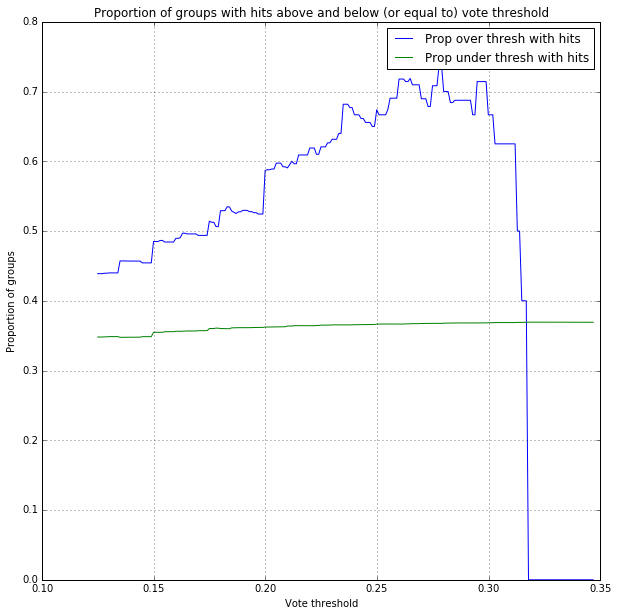

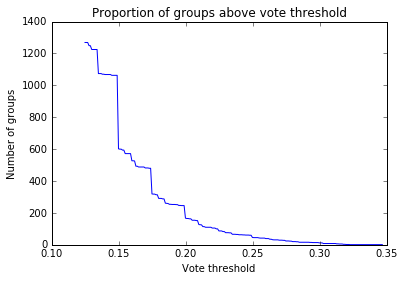

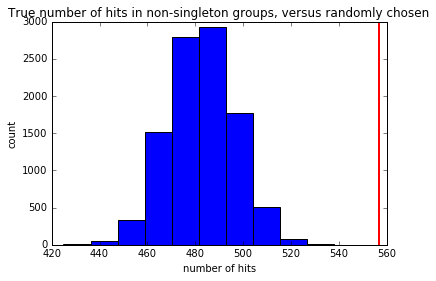

In [84]:
import helper_functions
urine = urinefiles[0][1]
print urine
v = [g.vote for g in groups[urine]]
helper_functions.hmdb_analysis(groups[urine],
                               filename=urine,
                               mtol=10,mode='pos',
                               v_thresh = np.arange(min(v),max(v),0.001))

Revised transformations
==

In [85]:
revised_groups = {}
for f in urinefiles:
    v = Voter(revised_transformations)
    filename = f[1]
    print "Performing voting on file {}".format(filename)
    file_groups = []
    for cluster in clusterings[filename].clusters:
        file_groups += v.make_groups(cluster.members)
    revised_groups[filename] = file_groups

Performing voting on file Urine_37_fullscan1_POS


Urine_37_fullscan1_POS
Number of raw hits (i.e. comparing all peaks): 2806 (36% of peaks)
Number of group hits (i.e. hits on group Ms): 2039 (37% of groups)


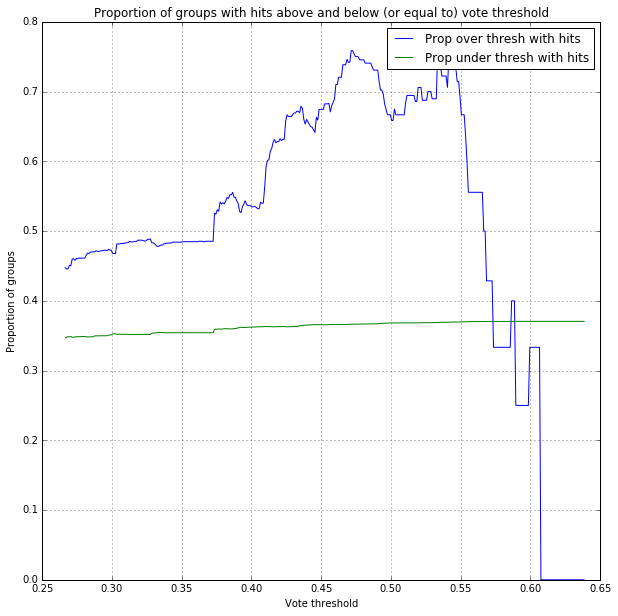

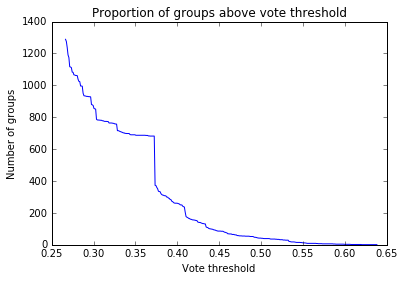

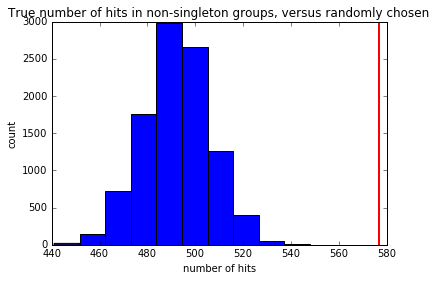

In [86]:
import helper_functions
urine = urinefiles[0][1]
print urine
v = [g.vote for g in revised_groups[urine]]


helper_functions.hmdb_analysis(revised_groups[urine],
                               filename=urine,
                               mtol=10,mode='pos',
                               v_thresh = np.arange(min(v),max(v),0.001))